# Transfomers
- Transformers are perhaps one of the most special, impactful and important creations in AI/Computer Science of **all time**.
- Transformer models are used to solve all kinds of tasks across different modalities, including natural language processing (NLP), computer vision, audio processing, and more.

### Hugging Face Transformers Library

The **Hugging Face Transformers** library is the most important and widely-used library for working with transformer models in the AI/ML ecosystem.

### What is it?
- A comprehensive Python library that provides easy access to thousands of pre-trained transformer models
- Supports all major transformer architectures: BERT, GPT, T5, RoBERTa, DistilBERT, and many more
- Provides a unified, consistent API regardless of the underlying model architecture
- Includes tools for fine-tuning, training from scratch, and deploying models to production

### Why it's significant
The library democratized AI by making state-of-the-art transformer models accessible to developers, researchers, and companies worldwide. It created a standardized interface that works across different model families and tasks, building the largest model hub with 100,000+ pre-trained models shared by the community. This massive ecosystem is now used by thousands of companies in real-world applications.

### The Pipeline Function - The Game Changer

- The `pipeline()` function is the most simple object in the transformers library, yet perhaps the most revolutionary feature - it's like having a "one-click" solution for AI tasks. It handles tokenization, model loading, and post-processing automatically, supporting 20+ different tasks (classification, generation, translation, summarization, etc.) with zero configuration needed.
- You can think of it as something that connects a model with its necessary preprocessing and postprocessing steps. This lets us directly input any text and get an intelligible answer.
- Below I will show you an example of sentiment analysis using the pipeline function, on our own inputs.

In [1]:
%pip install -r transformers_requirements.txt

  Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp310-cp310-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pandas-2.3.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 30.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp3

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis") # there are SO many differents tasks you could name here
# by default, a particular pretrained model that has been fine-tuned for sentiment analysis in English gets chosen
# here, sentinment-analysis defaults to distilbert-base-uncased-finetuned-sst-2-english,
# which is part of the BERT model lines (by Google)
classifier("I'm so hungry man!")

/Users/atin5551/Documents/GitHub/Applied AI ML Implementations/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'NEGATIVE', 'score': 0.9931273460388184}]

In [5]:
# Can even do multiple outputs
classifier(
    ["I'm so hungry man.", "I love food so much."]
)

[{'label': 'NEGATIVE', 'score': 0.9961236119270325},
 {'label': 'POSITIVE', 'score': 0.9998375177383423}]

It's worth noting that the model gets downloaded and cached when you create the classifier object. Now, everytime you rerun the command, the cached model gets used instead, no need for repeated downloads.
Here's what happens everytime you pass some text into a pipeline:
- The text is preprocessed into a format the model can understand.
- The preprocessed inputs are passed to the model.
- The predictions of the model are post-processed, so you can make sense of them.

It's also worth noting the different tasks you can do with the pipeline object. Below are some examples:

Text pipelines
- text-generation: Generate text from a prompt
- text-classification: Classify text into predefined categories
- summarization: Create a shorter version of a text while preserving key information
- translation: Translate text from one language to another
- zero-shot-classification: Classify text without prior training on specific labels
- feature-extraction: Extract vector representations of text

Image pipelines
- image-to-text: Generate text descriptions of images
- image-classification: Identify objects in an image
- object-detection: Locate and identify objects in images

Audio pipelines
- automatic-speech-recognition: Convert speech to text
- audio-classification: Classify audio into categories
- text-to-speech: Convert text to spoken audio

Multimodal pipelines
- image-text-to-text: Respond to an image based on a text prompt

Now, lets try classifying texts that haven't been labelled. We're going to use something called zero-shot classification, as it allows us to specify which labels to use for classification, so we don't have to rely on pretrained models' labels. 
- (The pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want.)

In the above example, we classified using 2 labels: positive and negative. But now I'll show you how to classify text using ANY set of labels of your choice.

In [6]:
classifier = pipeline("zero-shot-classification")
classifier(
    "History isn't really a fun class",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


{'sequence': "History isn't really a fun class",
 'labels': ['education', 'business', 'politics'],
 'scores': [0.7267491817474365, 0.19325977563858032, 0.07999099045991898]}

You can also choose a specific model for a specific task!

In [10]:
generator = pipeline("text-generation", model="HuggingFaceTB/SmolLM2-360M") # all these models names
# are names directly from the hugging face hub's website. You can plug in ANY model from their hub.
# It includes all possible basic models too, that you could ever think of.

# This is text generation, where you just provide some prompt, and the model auto-completes it by generating the remaining text.
# Similar to text predictions you see on your phone.
# Text generation is random, and it is unlikely you will get the exact same responses every time.

generator(
    "So today, I just feel like",
    max_length=30,
    num_return_sequences=2,
)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "So today, I just feel like I need to make sure that I am getting all of my 2016 goals accomplished. \xa0I have my goals for 2016, but I didn't get everything accomplished. \xa0So, I want to make sure that I can see what I have accomplished.\n\nI need to get more into the habit of writing in my journal, I think that will help me get through a lot of things. \xa0I know that when I feel like I am not feeling good, I can just go into my journal and take a look at what I should be doing. \xa0It will help me see where I need to improve.\n\nI am going to post the 2016 goals that I have listed in this post. \xa0I have listed the goals for each day, and will have a few goals for each week and month.\n\nI want to be able to see these goals, so I can see where I am and where I need to improve. \xa0I know that if I don't see these, I will feel discouraged and will not be able to get through a lot of things.\n\nI want to be able to see how far I have come, so even if I didn't a

There are SO many other tasks and examples I could show you, that I will not be exhaustively going over them here.

## Combining data from multiple sources
One powerful application of Transformer models is their ability to combine and process data from multiple sources. This is especially useful when you need to:

- Search across multiple databases or repositories
- Consolidate information from different formats (text, images, audio)
- Create a unified view of related information

For example, you could build a system that:
- Searches for information across databases in multiple modalities like text and image.
- Combines results from different sources into a single coherent response. For example, from an audio file and text description.
- Presents the most relevant information from a database of documents and metadata.

This is an import aspect of transformers, and is just something worth noting.
Next, we're going to get into the really good stuff, the nitty-gritty, how transformers ACTUALLY work, whats goes on in the inside, and transformer model architecture, in general.

# Transformer Architecture
- Transformer architecture is mainly composed of 2 blocks/layers/models:
  - Encoder layer (left): The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.
  - Decoder (right): The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs. 
- Here's an image for visualisation

![Transformer Architecture Visualisation](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_blocks-dark.svg)
- Each of these parts can be used independently too, depending on the task:
  - Encoder-only models: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
  - Decoder-only models: Good for generative tasks such as text generation.
  - Encoder-decoder models or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization (what you see with pure ChatGPT).
- Another key aspect of Transformer models are **Attention layers**.
  - By the way, the transformer architecture was introduced in a Google paper titled "Attention is All You Need". Says a lot.
-  This layer tells the model to pay attention **specifically** to certain parts of the data (e.g. with LLMs, that would be words in the sentence) that you passed it (and more or less ignore the others), when dealing with the representation of each piece of data (word). 
    - Here's an example: imagine you have to translate "You like this house" from English to French. The translation model will need to look at "you" to get the proper translation for "like", because in French, the word "like" is written differently depending on the subject. But, the rest of the sentence is not useful for the translation of "like".
    - In the same way, when translating “this” the model will also need to pay attention to the word "house", because “this” translates differently, depending on if the noun is masculine or feminine. Again, the other words in the sentence will not matter for the translation of “house”. 
    - With more complex sentences (and more complex grammar rules), the model would need to pay special attention to words that might appear farther away in the sentence to properly translate each word.
    - This same concept applies to ANY task at ANY scale associated with natural language: a word by itself has a meaning, but that meaning is deeply affected by the context, which can be any other word (or words) before or after the word being studied.
    - Here's a code visualization and application of our example:

/Users/atin5551/Documents/GitHub/Applied AI ML Implementations/.venv/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Input sentence: 'You like this house'
Tokens: ['▁You', '▁like', '▁this', '▁house', '</s>']
Attention tensor shape: torch.Size([1, 8, 5, 5])
Filtered tokens (no special tokens): ['▁You', '▁like', '▁this', '▁house']
Filtered attention shape: torch.Size([4, 4])


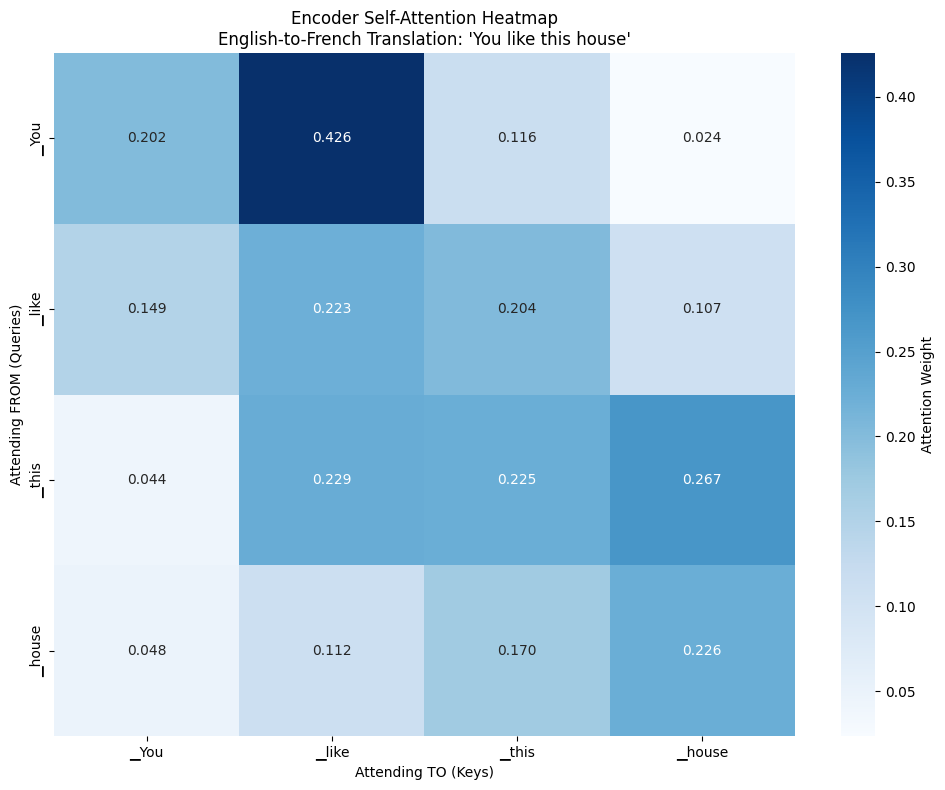


Interpretation Guide:
--------------------------------------------------
This heatmap shows how much each word (row) attends to each word (column) during encoding.
Higher values (darker blue) indicate stronger attention connections.
For example, 'like' may attend strongly to 'You' for proper French conjugation,
and 'this' may attend to 'house' for gender agreement in French.


<Figure size 640x480 with 0 Axes>

The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Attention Analysis:
--------------------------------------------------
'▁You' → '▁like': 0.426
'▁like' → '▁this': 0.204
'▁this' → '▁like': 0.229
'▁this' → '▁house': 0.267

Translation: Tu aimes cette maison

Self-attention scores:
'▁You' self-attention: 0.202
'▁like' self-attention: 0.223
'▁this' self-attention: 0.225
'▁house' self-attention: 0.226


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import MarianMTModel, MarianTokenizer

# Load the pretrained English-to-French translation model
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(
    model_name,
    attn_implementation="eager",  # Use eager attention implementation
    output_attentions=True        # Enable attention outputs
)

# Set model to evaluation mode
model.eval()

# Input sentence
sentence = "You like this house"
print(f"Input sentence: '{sentence}'")

# Tokenize the input
inputs = tokenizer(sentence, return_tensors="pt", padding=True)
input_ids = inputs["input_ids"]

# Get token strings for visualization (excluding special tokens)
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print(f"Tokens: {tokens}")

# Forward pass with attention outputs - use encoder only
with torch.no_grad():
    # Get encoder outputs only to avoid decoder issues
    encoder_outputs = model.get_encoder()(
        input_ids=input_ids,
        attention_mask=inputs.get("attention_mask"),
        output_attentions=True,
        return_dict=True
    )

# Extract encoder self-attention weights from the last layer
encoder_attentions = encoder_outputs.attentions  # Tuple of attention weights for each layer
last_layer_attention = encoder_attentions[-1]    # Shape: (batch_size, num_heads, seq_len, seq_len)

print(f"Attention tensor shape: {last_layer_attention.shape}")

# Average over attention heads
attention_weights = last_layer_attention.mean(dim=1)  # Shape: (batch_size, seq_len, seq_len)
attention_weights = attention_weights.squeeze(0)      # Remove batch dimension

# Identify special tokens to exclude
special_tokens = ["<pad>", "</s>", "<s>", "<unk>"]
non_special_indices = [i for i, token in enumerate(tokens) if token not in special_tokens]

# Filter out special tokens
filtered_tokens = [tokens[i] for i in non_special_indices]
filtered_attention = attention_weights[non_special_indices][:, non_special_indices]

print(f"Filtered tokens (no special tokens): {filtered_tokens}")
print(f"Filtered attention shape: {filtered_attention.shape}")

# Create the attention heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_attention.numpy(),
    xticklabels=filtered_tokens,
    yticklabels=filtered_tokens,
    cmap="Blues",
    annot=True,
    fmt=".3f",
    cbar_kws={"label": "Attention Weight"}
)

plt.title("Encoder Self-Attention Heatmap\nEnglish-to-French Translation: 'You like this house'")
plt.xlabel("Attending TO (Keys)")
plt.ylabel("Attending FROM (Queries)")

plt.tight_layout()
plt.show()

# Print explanation as separate section after the plot
print("\nInterpretation Guide:")
print("-" * 50)
print("This heatmap shows how much each word (row) attends to each word (column) during encoding.")
print("Higher values (darker blue) indicate stronger attention connections.")
print("For example, 'like' may attend strongly to 'You' for proper French conjugation,")
print("and 'this' may attend to 'house' for gender agreement in French.")

plt.tight_layout()
plt.show()

# Print some analysis of the attention patterns
print("\nAttention Analysis:")
print("-" * 50)

# Find the strongest attention connections
for i, source_word in enumerate(filtered_tokens):
    for j, target_word in enumerate(filtered_tokens):
        if i != j:  # Skip self-attention
            attention_score = filtered_attention[i, j].item()
            if attention_score > 0.2:  # Threshold for "strong" attention
                print(f"'{source_word}' → '{target_word}': {attention_score:.3f}")

# Get actual translation for comparison (separate forward pass)
with torch.no_grad():
    translation_outputs = model.generate(input_ids, max_length=50, num_beams=1, do_sample=False)
    translation = tokenizer.decode(translation_outputs[0], skip_special_tokens=True)

print(f"\nTranslation: {translation}")

# Show self-attention scores (diagonal)
print(f"\nSelf-attention scores:")
for i, word in enumerate(filtered_tokens):
    self_attention = filtered_attention[i, i].item()
    print(f"'{word}' self-attention: {self_attention:.3f}")

- (Don't worry too much if you don't understand all the code just yet).
- In the image above, we visualize the self-attention matrix from the encoder of a MarianMT model translating the English sentence “You like this house” into French. Here’s how to interpret it:
-	Y-axis (Query): The word that is currently being processed by the model — i.e., which word is paying attention.
-	X-axis (Key): The potential context words that the query word is attending to.
-	Color intensity: The darker the blue, the stronger the attention weight between those two words.
    -	**As you can see**, “you” attends strongly to “like”, due to the reason we spoke about earlier, that the French conjugation of “like” (aimer) depends on the subject (“you” → tu or vous).
    -	Similarly, **as we said**, “this” attends most to “house”, likely to determine the correct gendered demonstrative (e.g., cette maison for a feminine noun).
    - In fact, "you" attending to "like", and "this" attending to "house" are the **darkest** (highest attention weight) pairs of words on there in the self-attention matrix graphic! That's no coincidence!
-	The values inside each cell represent the attention score, i.e., how much focus the model places on that relationship during encoding.
This map reflects how context-sensitive understanding is built into translation — and how the attention mechanism lets the model dynamically adjust focus based on linguistic relationships.

- In short, a row shows which tokens a particular word is focusing on.

- Now that you hopefully have an idea of what attention layers are, lets look at the original transformer architecture:
  - Original transformer architecture was designed for translation.
  - During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same, matching sentences in the desired target language. 
  - In the encoder, the attention layers can use all the words (process the vectorized values of all the words at once) in a sentence (since, as we just saw, the translation of a given word can be dependent on anything within the REST of the sentence). 
    - Each token (say, “like”) is allowed to “look at” all other tokens in the sentence 
      - Note: In the attention visualization, you’ll see terms like “attention between words”, but under the hood, the model is actually working with tokens — chunks of text that are processed numerically. Don’t worry if you haven’t seen this term yet — we’ll formally explain what a token is and how words get converted into tokens and embeddings in the next notebook.
    - It calculates attention scores between itself and all others — not just those before or after it.
    - This helps it build a context-rich representation of itself.
    - So when the encoder processes "like", it doesn’t do so blindly — it considers “you”, “this”, and “house” simultaneously.
  - The decoder, however, works sequentially (as in, it works step-by-step, generating 1 word at a time (like "Tu", then "aimes" and so on)) and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). 
    - For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.
    - This process of only looking at the previously generated words at each step is called causal/auto-regressive attention.
  - To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!).
    - By giving the decoder the full target sentence but masking out the future tokens, you allow the model to compute all the outputs in parallel (just like the encoder does), rather than having to wait and generate one at a time. 
    - This drastically reduces training time, because the computation is parallelized instead of sequential.
  - For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3, because tokens 3 to the last token will be masked out.
  - Here's a visualisation of the original Transformer architecture, with the encoder on the left and the decoder on the right:

![Original Transformer Architecture Visualisation](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers-dark.svg)

  - Note that the first attention layer in a decoder block pays attention to all (past) inputs to the decoder.
  - The second attention layer uses the output of the encoder and all info passed forward from the 1st layer. It can thus access the whole input sentence, as well as the output generated so far, to best predict the current word.
    - This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.
	-	There is also the attention mask, which plays an important role during training and inference.
  - When working with batches of sentences, not all sentences are the same length — some are shorter, and some are longer. To fit them into a uniform shape (e.g., a matrix), we pad the shorter sentences with special “padding” tokens so that all sequences match the length of the longest one.
	-	However, these padding tokens don’t carry any real information, and we don’t want the model to waste attention on them.
  - This is where the attention mask comes in: it tells the model which tokens are real and should be attended to, and which ones are just padding and should be ignored.
  - Think of it like giving the model a blindfold for certain tokens — “Don’t look at these, they aren’t part of the actual sentence.”
  - Here's a visualisation:

  ![Padded sequence with attention mask matrix](padding.png)

  - Hopefully, this gave you a solid mental model of how the original Transformer architecture works — particularly the encoder-decoder setup and how attention mechanisms shape language understanding and generation. We covered this not just for historical context, but because these components (like self-attention, masking, and encoder-decoder flows) form the foundation of nearly all modern Transformer-based models. 
    - Understanding them now will make it much easier to grasp variants like GPT, BERT, or T5, and to debug, fine-tune, or even build your own architectures later on.
  #### Architectures and checkpoints
  - This is terminology that is important to know for now and later. You’ll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:
    - **Architecture**: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.
    - **Checkpoints**: These are the weights that will be loaded in a given architecture.
    - **Model**: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint": it can mean both. This repo will specify architecture or checkpoint when it matters to reduce ambiguity.
    - Example: BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”
    - GPT-2 → Architecture, while gpt2, gpt2-medium, gpt2-large → Checkpoints trained on WebText
	  - GPT-NeoX → Architecture, while EleutherAI/gpt-neox-20b → Checkpoint trained by EleutherAI
	  - T5 → Architecture while t5-small, t5-base, t5-3b → Different checkpoints (varying sizes)
	  - GPT-4o → Architecture while gpt-4o (OpenAI API) → A specific checkpoint exposed via OpenAI’s infrastructure


### A Note on GPT: Decoder-Only Transformers

I wanted to include this part to help deepen your understanding of transformers and more specifically their **applications** (especially with decoders) even further, and especially by relating it to an example highly relevant to modern AI usage and something that you likely relate to and is a massive presence in your life: ChatGPT.

The original **GPT architecture** (Generative Pretrained Transformer), first introduced in the GPT-1 paper by OpenAI, was designed as a **decoder-only Transformer**. This means it was built purely for **text generation**, without an encoder component.

#### Key Features of GPT:
- **Decoder-only**: There is no encoder. All input is handled directly by the decoder stack.
- **Causal (unidirectional) attention**: Each token can only attend to tokens **before it** — not future tokens.
- **Trained with a next-token prediction objective**: The model learns to predict the next word given all previous words in the sequence.
- **Cannot accept encoded input**: Unlike encoder-decoder models (e.g., T5 or translation models), GPT does **not** take in a separately encoded source sentence.
- Example: How GPT Works

  - If you give GPT the prompt:  
  - `"The capital of France is"`  
  - It will continue the sentence — `"Paris."` — using its internal understanding of the language.
  - It doesn’t “encode” the input and then “decode” a response — the model **generates directly** using the same decoder layers throughout.

##### But what about ChatGPT and complex prompts?

Even though models like GPT-3.5 and GPT-4 are still decoder-only, clever techniques such as:
- prompt formatting,
- system/user roles,
- fine-tuning on dialogue datasets, and
- embedding-based retrieval

allow them to **simulate** more complex input-output behaviors (like reasoning, question answering, or summarization). But under the hood, it's still a decoder-only model generating one token at a time.

To make this make sense in your head, heres a specific example:
- If a user types into ChatGPT: "Can you help me with understanding matrix multiplication?"
- The ChatGPT, a decoder model, actually sees something along the lines of...
```
User: Okay so if this is the input (this message i am sending right now) what are you seeing?
Assistant:
```
- ...due to prompt engineering/system refinement that OpenAI have done to make their product, ChatGPT, as effective as possible.
- At this point, the model’s job is to continue this sequence, one token at a time, in a way that best fits the pattern it has seen in its training data.
- It has no separate “input” section and no separate “output” mechanism. It’s just a single text sequence that it’s trying to complete.
- So when you ask a question, it doesn’t “think” in terms of “processing the question” and “giving an answer” — it just generates the most likely next few tokens that fit the format of an assistant replying to a user question.

⸻

#### Why didn’t OpenAI just use encoder-decoder models for GPT?

Because decoder-only models are **simpler, faster**, and **sufficiently powerful** — *if* you train them right and prompt them well.

Let’s break this down:

| Feature | Encoder-Decoder (e.g., T5) | Decoder-Only (e.g., GPT) |
|--------|-----------------------------|---------------------------|
| **Architecture** | Two parts: encoder reads input, decoder writes output | One part: decoder just continues text |
| **Pros** | Clean input/output separation, good for translation and QA | Simpler, more parallelizable, faster |
| **Training** | Needs labeled input-output pairs | Can be trained on raw text |
| **Use cases** | Translation, summarization, question answering | Chatbots, code generation, story writing |

So yes — encoder-decoder could *in theory* give more structured handling of “questions vs answers.”  
But decoder-only:
- Needs less compute (only one block)
- Trains on larger unsupervised corpora
- Has proven *shockingly capable* with few-shot prompting
- Avoids complexity of managing two towers (encoder + decoder)

> ⚠️ GPT-style prompting is *not a hack* — it’s a **design tradeoff**. They picked “scalable + general-purpose” over “structured + supervised.”

This decision ultimately helped power the generality and versatility that made ChatGPT so widespread.

- **Note**: you may have heard of "thinking LLMs". We will go over these in detail in the ```llms/``` section of this project. For now, all that is worth mentioning is that they are **NOT** the same as encoder-decoder models like T5.


### How transformers solve their tasks
- Now, we will delve into specific transformer architectural variants, and how they solve their respective, specific tasks. Before we do this however, its important to understand that most tasks follow a similar pattern: input data is processed through a model, and the output is interpreted for a specific task. The differences lie in how the data is prepared, what model architecture variant is used, and how the output is processed.
- To explain how tasks are solved, we’ll walk through what goes on inside the model to output useful predictions. We’ll cover the following models and their corresponding tasks:

  - Wav2Vec2 for audio classification and automatic speech recognition (ASR)
  - Vision Transformer (ViT) and ConvNeXT for image classification
  - DETR for object detection
  - Mask2Former for image segmentation
  - GLPN for depth estimation
  - BERT for NLP tasks like text classification, token classification and question answering that use an encoder
  - GPT2 for NLP tasks like text generation that use a decoder
  - BART for NLP tasks like summarization and translation that use an encoder-decoder



## Language models, and the most famous examples:
- All the popular Transformer models (GPT, BERT, T5, etc.) have been trained as language models. 
- Language models are just models that have been trained on large amounts of raw text in a self-supervised fashion.
- They are the heart of modern NLP.
- (Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!)
- This type of model develops a statistical understanding of the patterns and relationships between words or tokens in the text it has been trained on, but it’s less useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning or fine-tuning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.
  - Transfer learning and fine-tuning are briefly covered below.
- An example of a task is predicting the next word in a sentence having read the n previous words. This is called causal language modeling because the output depends on the past and present inputs, but not the future ones.
- Example below:

![Causal language modeling visualization](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/causal_modeling-dark.svg)

- Additionally, the general strategy to achieve better performance is by increasing the models’ sizes as well as the amount of data they are pretrained on.
- Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources.
- This means sharing models/resources is very efficient and optimal, because it saves time, potentially money, and just overall resources for everyone.
- We will go over examples in more detail later.

#### How language models work
- Language models work by being trained to predict the probability of a word given the context of surrounding words. This gives them a foundational understanding of language that can generalize to other tasks.

- There are two main approaches for training a transformer model:

- **Masked language modeling (MLM):** Used by encoder models like BERT, this approach randomly masks some tokens in the input and trains the model to predict the original tokens based on the surrounding context. This allows the model to learn bidirectional context (looking at words both before and after the masked word).

- **Causal language modeling (CLM):** Used by decoder models like GPT, this approach predicts the next token based on all previous tokens in the sequence. The model can only use context from the left (previous tokens) to predict the next token.

- Once again, lets briefly go over the **types** of language models

### Types of language models
- In the Transformers library, language models generally fall into three architectural categories:

- Encoder-only models (like BERT): These models use a bidirectional approach to understand context from both directions. They’re best suited for tasks that require deep understanding of text, such as classification, named entity recognition, and question answering.

- Decoder-only models (like GPT, Llama): These models process text from left to right and are particularly good at text generation tasks. They can complete sentences, write essays, or even generate code based on a prompt.

- Encoder-decoder models (like T5, BART): These models combine both approaches, using an encoder to understand the input and a decoder to generate output. They excel at sequence-to-sequence tasks like translation, summarization, and question answering.

- For reminder purposes, heres a visualisation: 

![Language Model Architecture(s) visualisation](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_architecture.png)



## Transfer Learning
- Initializing a model with another model's weights.
- Essentially, you leverage the knowledge acquired by a model trained on LOTS of data on another task.
### Pre-training
- **Pretraining**: training a model from scratch. The weights are initially randomly initialized, and the training starts with 0 knowledge.
  - This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.
- **Fine-tuning**: training done AFTER a model has been pretrained. To perform fine-tuning, you first need a pretrained language model, then need to perform additional training with a dataset highly specific to your task.
  - Now, this might seem confusing. Just train your model for your final use case from the start right? Here's some reasons why you do things this way:
  - The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
  - Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
  - For the same reason, the amount of time and resources needed to get good results are much lower.
  - Fine-tuning example:
    - You can take a pretrained model (that was thoroughly trained on the English language), and fine-tune it on the arXiv corpus, which then results in a science/research-based model.
      - Corpus: a large and structured collection of text or speech data used for linguistic analysis and training ML models. In NLP/LLM context, it acts as the training data for our models that need to generate human language. 
      - arXiv corpus: arXiv is an archive of scholarly articles, primarily in scientific fields. So the arXiv corpus is a collection of scholarly articles available on the arXiv repository. 
    - The fine-tuning will only require a limited amount of data. The knowledge the pretrained model has acquired is “transferred,” (You’re transferring the capabilities of the pretrained model to a new domain/task using the arXiv data), hence the term transfer learning.
- Important to note, that transfer learning **ENCOMPASSES** fine-tuning.
- In most situations, fine-tuning revolves around retraining the last couple layers of a model, but can be applied to the whole model.  
- Fine-tuning a model has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes (full fine-tuning, last-layer tuning, freezing first n-layers and training/readjusting the rest, peft, etc), as the training is less constraining (cheaper, faster, easier to experiment with) than a full pretraining.
- This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

Now, we will explore a specific model architectures and how its applied for its corresponding task. The original thought process was to go over multiple of these, but they delve into so much detail, that I've decided it would be a lot better to teach and show case them through the `llms/` section of this project.
- Understanding which part of the Transformer architecture (encoder, decoder, or both) is best suited for a particular NLP task is key to choosing the right model. Generally, tasks requiring bidirectional context use encoders, tasks generating text use decoders, and tasks converting one sequence to another use encoder-decoders.
  - We will go very in-depth into these 3 different types, and what they're good at and when best to use each one, later below. For now, lets take a look at text generation as an example!

### Text generation
- Text generation involves creating coherent and contextually relevant text based on a prompt or input.

- GPT-2 is a decoder-only model pretrained on a large amount of text. It can generate convincing (though not always true!) text given a prompt and complete other NLP tasks like question answering despite not being explicitly trained to.

![Text Generation Architecture visualisation](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/gpt2_architecture.png)

- GPT-2 uses byte pair encoding (BPE) to tokenize words and generate a token embedding. Positional encodings are added to the token embeddings to indicate the position of each token in the sequence. The input embeddings are passed through multiple decoder blocks to output some final hidden state. Within each decoder block, GPT-2 uses a masked self-attention layer which means GPT-2 can’t attend to future tokens. It is only allowed to attend to tokens on the left. This is different from BERT’s [mask] token because, in masked self-attention, an attention mask is used to set the score to 0 for future tokens.

- The output from the decoder is passed to a language modeling head, which performs a linear transformation to convert the hidden states into logits. The label is the next token in the sequence, which are created by shifting the logits to the right by one. The cross-entropy loss is calculated between the shifted logits and the labels to output the next most likely token.

- GPT-2’s pretraining objective is based entirely on causal language modeling, predicting the next word in a sequence. This makes GPT-2 especially good at tasks that involve generating text.

- Later in the `LLMs/` section, I will cover causal language modeling more in-depth, and explain how to finetune DistilGPT-2 and use it for inference!

#### More in-depth examples
- I will go over each of these application examples, with each one having its own notebook, in the `LLMs/` section of this project.
- The examples will be on:
  - Text classification via BERT
  - Token classification via BERT
  - Question answering via BERT
  - Summarization via T5
  - Translation via T5
  - How speech and audio recognition are handled via Whisper
  - Computer Vision (Image classification for example) via ViT and ConvNeXT

## The 3 architectural variants of Transformer models, and when to use each one
#### Encoder models
- Encoder models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having “bi-directional” attention, and are often called auto-encoding models.

- The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

- Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering

- As we saw earlier, encoder models like BERT excel at understanding text because they can look at the entire context in both directions. This makes them perfect for tasks where comprehension of the whole input is important.

- The biggest representatives of this family of models include:
  - BERT
  - DistilBERT
  - ModernBERT
  - As you can see, this space is very dominated by BERT/Google


#### Decoder models
- Decoder models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models.
- The pretraining of decoder models usually revolves around predicting the next word in the sentence.

- These models are best suited for tasks involving text generation.
> Decoder models like GPT are designed to generate text by predicting one token at a time. As we explored earlier, they can only see previous tokens, which makes them excellent for creative text generation but less ideal for tasks requiring bidirectional understanding.

##### Representatives of this family of models include:

- Hugging Face SmolLM Series
- Meta’s Llama Series
- Google’s Gemma Series
- DeepSeek’s V3

##### Modern LLMs
- Most modern Large Language Models (LLMs) use the decoder-only architecture. These models have grown dramatically in size and capabilities over the past few years, with some of the largest models containing hundreds of billions of parameters.

- Modern LLMs are typically trained in two phases:

- Pretraining: The model learns to predict the next token on vast amounts of text data
- Instruction tuning: The model is fine-tuned to follow instructions and generate helpful responses
- This approach has led to models that can understand and generate human-like text across a wide range of topics and tasks.

##### Key capabilities of modern LLMs
- Modern decoder-based LLMs have demonstrated impressive capabilities:
- Capability	Description	Example
- Text generation	Creating coherent and contextually relevant text	Writing essays, stories, or emails
- Summarization	Condensing long documents into shorter versions	Creating executive summaries of reports
- Translation	Converting text between languages	Translating English to Spanish
- Question answering	Providing answers to factual questions	“What is the capital of France?”
- Code generation	Writing or completing code snippets	Creating a function based on a description
- Reasoning	Working through problems step by step	Solving math problems or logical puzzles
- Few-shot learning	Learning from a few examples in the prompt	Classifying text after seeing just 2-3 examples
- Hugging Face is a great place where you can directly play around with and test different models through convenient UI.

# Sequence to Sequence models
- 